# Machine Learning Task 2

##  Import necessary libraries and load  seed dataset.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# load seed dataset
dataset = pd.read_csv("seeds_dataset.txt", delimiter="\t")

# Set labels (the original seed dataset does not have feature labels)
dataset.columns = ['Area', 'Perimeter', 'Compactness', 'Length', 'Width', 'Asymmetry', 'GrooveLength', 'Class']

# Divide the dataset into features and labels
X = dataset.iloc[:, :-1]  # feature vector
y = dataset.iloc[:, -1]   # label

## Draw a correlation matrix between features and understand the linear relationship between features

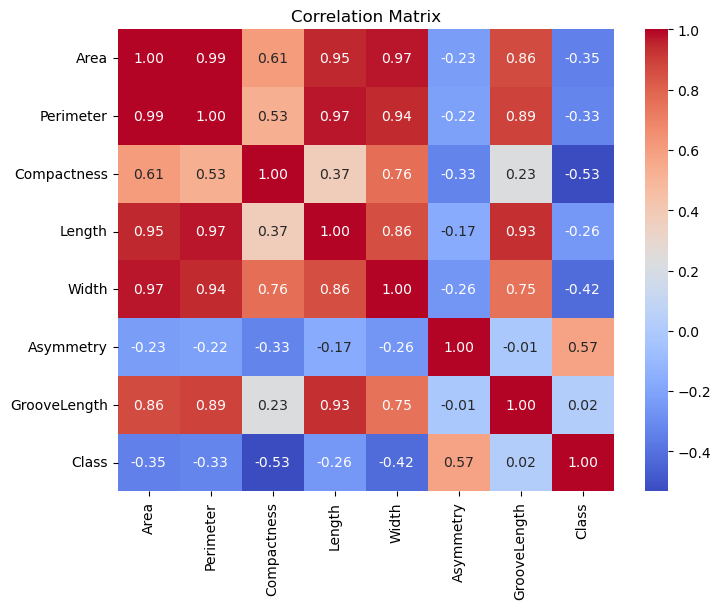

In [2]:
correlation_matrix = dataset.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## 1. Use logistic regression to implement the classification on the Seeds dataset. 

 Logistic regression mainly solves binary classification problems, commonly referred to as positive and negative classes. The dependent variable describes the probability of a positive outcome. If this probability is equal to or greater than a threshold used to distinguish (usually 0.5), it is predicted as a positive class, otherwise it is predicted as a negative class.

Logistic Regression Coefficients:
Area : 0.096
Perimeter : 0.196
Compactness : 0.208
Length : 1.365
Width : -0.038
Asymmetry : -0.868
GrooveLength : -1.886

Accuracy: 0.9285714285714286


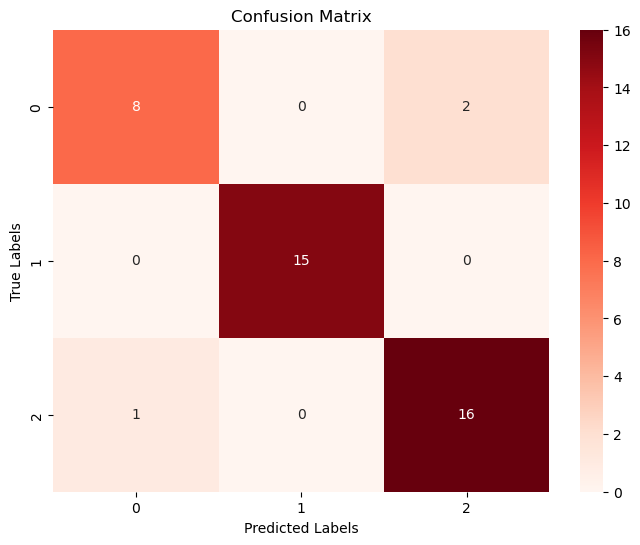

In [3]:
# Standardized features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Divide the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression classifier
classifier = LogisticRegression()

# Training logistic regression classifiers
classifier.fit(X_train, y_train)

# Make predictions on the test set
predictions = classifier.predict(X_test)

# Output the values of regression parameters
print("Logistic Regression Coefficients:")
coefficients = classifier.coef_
for feature, coef in zip(dataset.columns[:-1], coefficients[0]):
    print(feature, ':', round(coef, 3))

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("\nAccuracy:", accuracy)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## 2. Use LDA to implement the classification on the Seeds dataset. 

Logistic Regression Coefficients:
Area : -31.231
Perimeter : 24.666
Compactness : 5.353
Length : 10.862
Width : -0.913
Asymmetry : -1.075
GrooveLength : -8.76

Accuracy: 0.9285714285714286

classification Report:
               precision    recall  f1-score   support

           1       0.82      0.90      0.86        10
           2       1.00      1.00      1.00        15
           3       0.94      0.88      0.91        17

    accuracy                           0.93        42
   macro avg       0.92      0.93      0.92        42
weighted avg       0.93      0.93      0.93        42



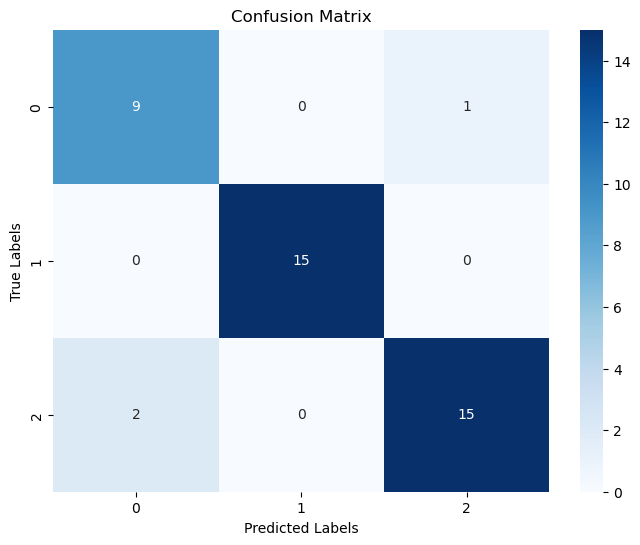

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Create and train the LDA classifier
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Make predictions on the test set
predictions = lda.predict(X_test)

# Output the values of regression parameters
print("Logistic Regression Coefficients:")
coefficients = lda.coef_
for feature, coef in zip(dataset.columns[:-1], coefficients[0]):
    print(feature, ':', round(coef, 3))

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("\nAccuracy:", accuracy)

print("\nclassification Report:\n",classification_report(y_test, predictions))

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## 3. Use KNN to implement the classification on the Seeds dataset.

Accuracy: 0.9523809523809523


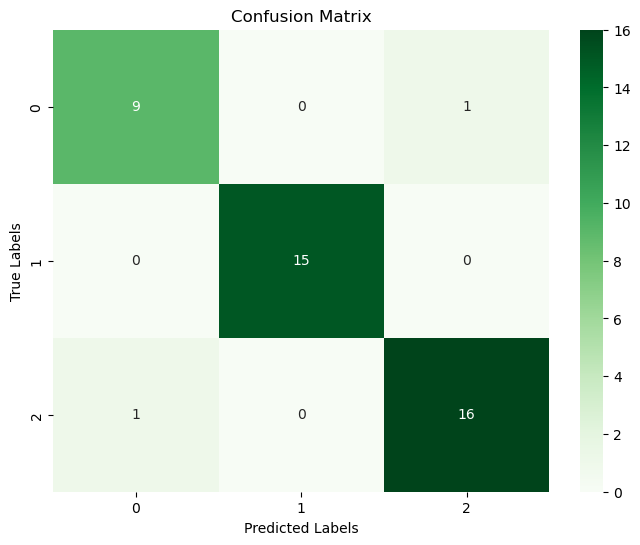

In [5]:
from sklearn.neighbors import KNeighborsClassifier

# Create and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on the test set
predictions = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## 4. Use Naive Bayes classification to implement the classification on the Seeds dataset. 

Accuracy: 0.8809523809523809


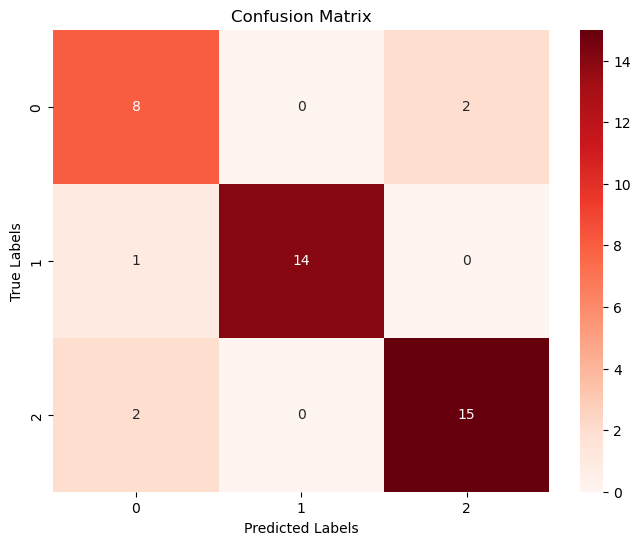

In [6]:
from sklearn.naive_bayes import GaussianNB

# Create and train the Gaussian Naive Bayes classifier
nb = GaussianNB()
nb.fit(X_train, y_train)

# Make predictions on the test set
predictions = nb.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## 5. Use SVM to implement the classification on the Seeds dataset. 

Accuracy: 0.9047619047619048


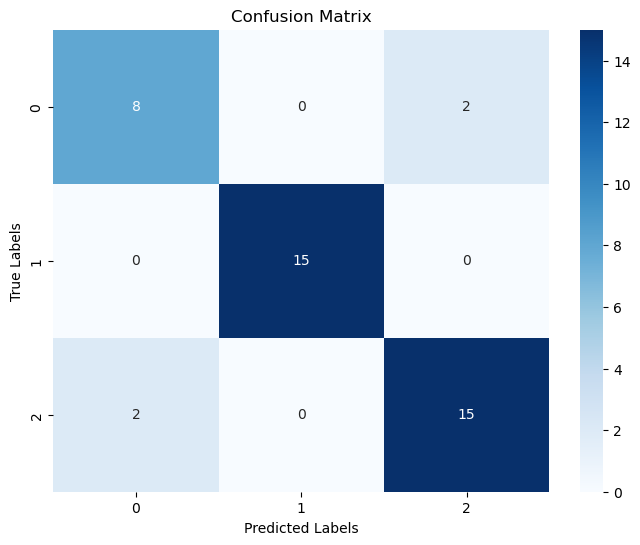

In [7]:
from sklearn.svm import SVC

# Create and train the SVM classifier
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Make predictions on the test set
predictions = svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## 6. Use decision tree to implement the classification on the Seeds dataset. 

Accuracy: 0.8809523809523809


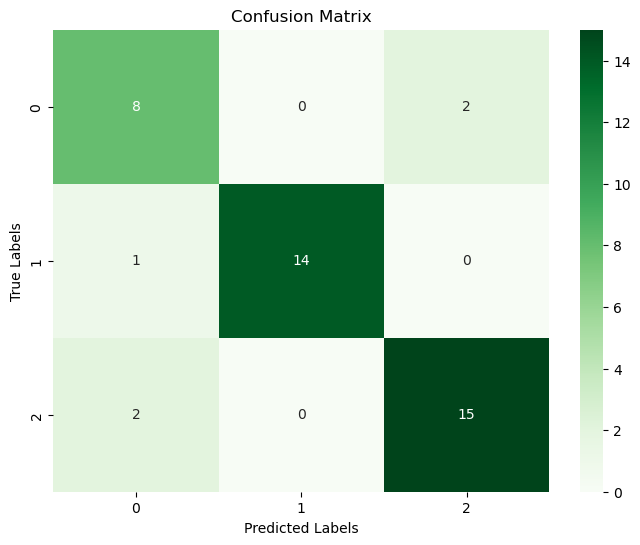

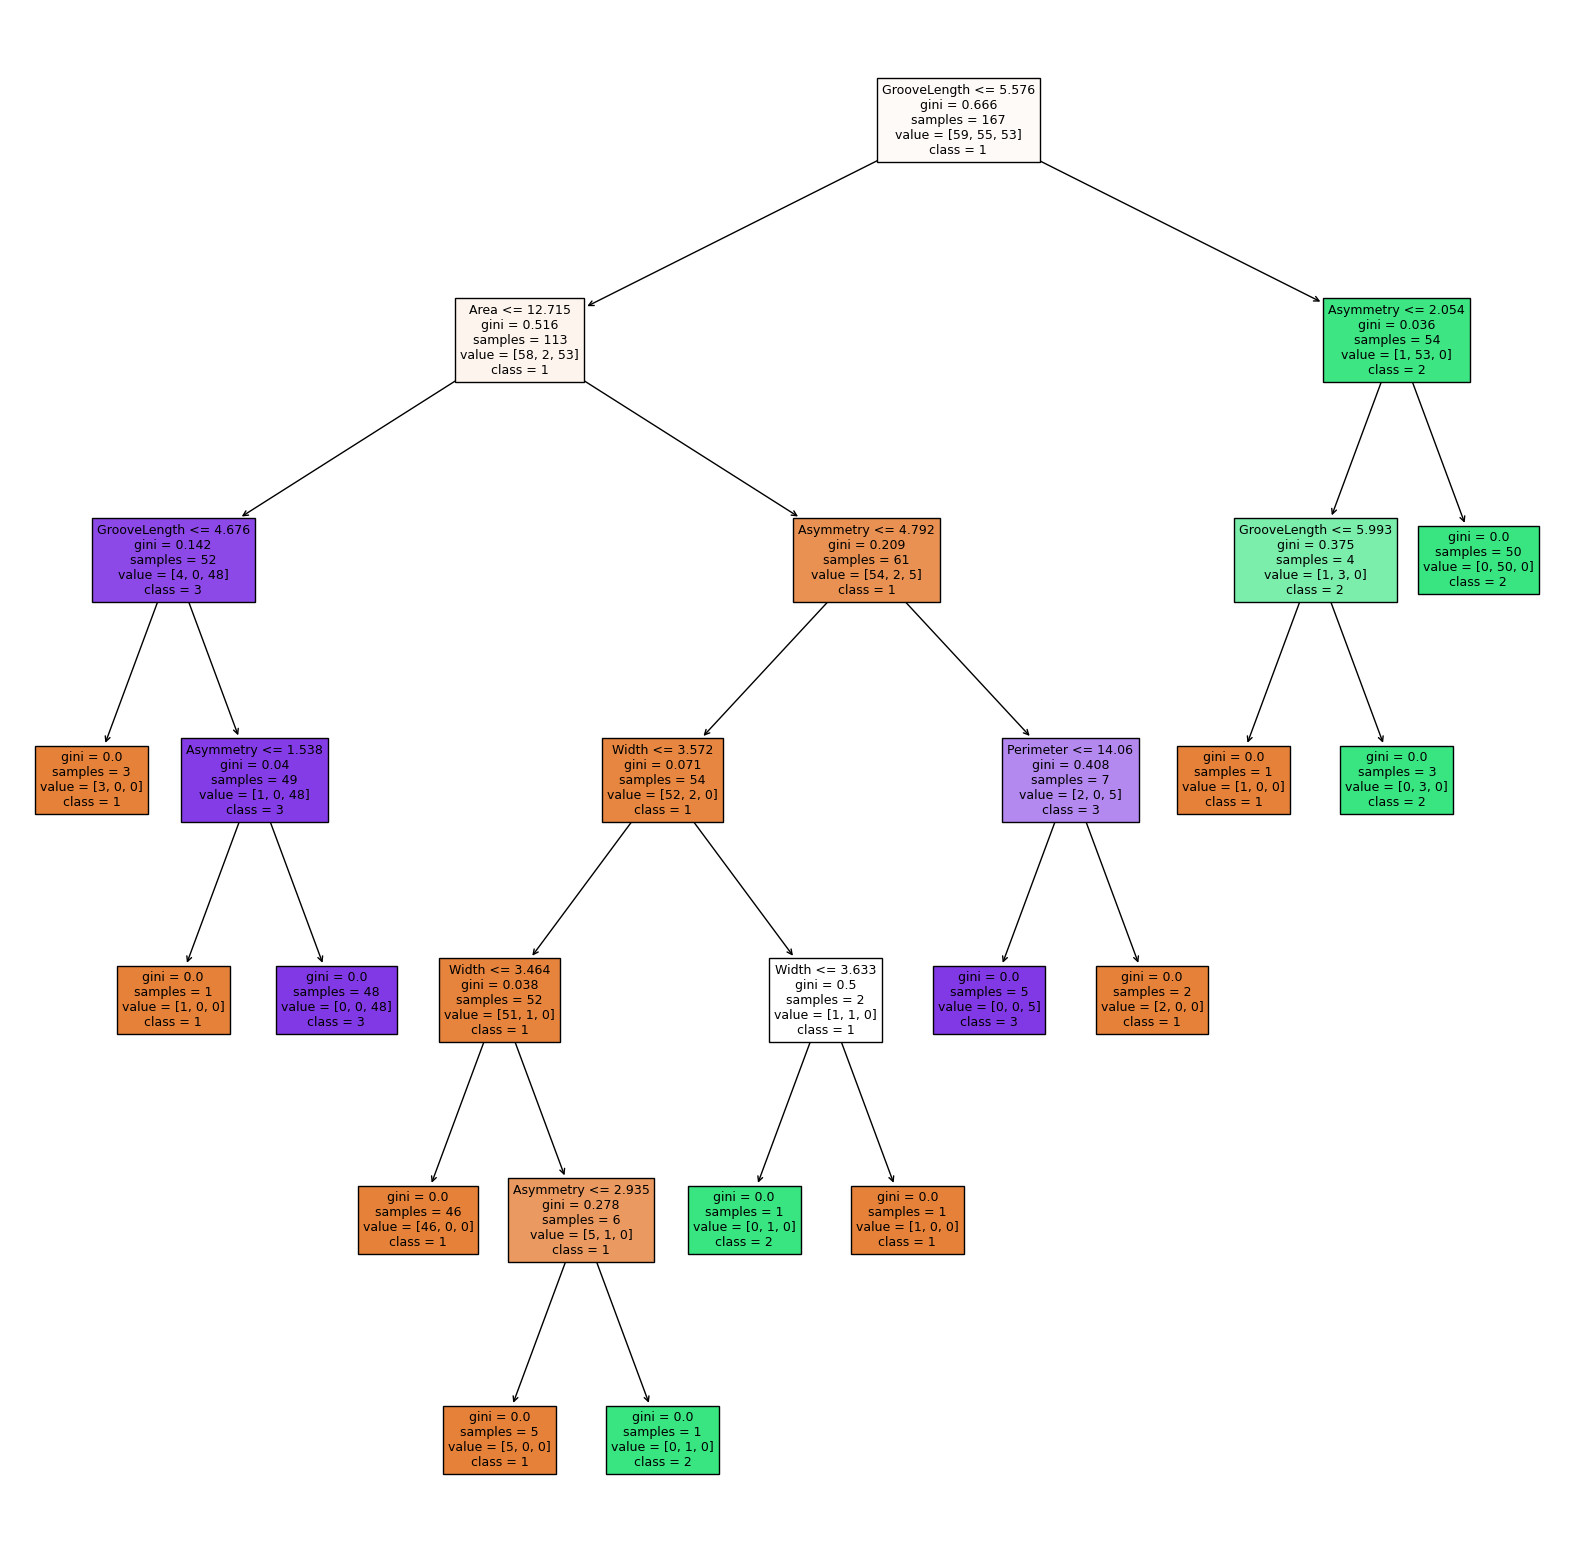

In [8]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# 加载 Seed 数据集
dataset = pd.read_csv("seeds_dataset.txt", delimiter="\t")

# 将数据集划分为特征和标签
X = dataset.iloc[:, :-1]  # 特征向量
y = dataset.iloc[:, -1]   # 标签

# 将数据集划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
predictions = dt_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Visualize the decision tree
plt.figure(figsize=(20,20))
plot_tree(dt_classifier, filled=True, feature_names=['Area', 'Perimeter', 'Compactness', 'Length', 'Width',
                                                     'Asymmetry', 'GrooveLength'], class_names=["1", "2", "3"])
plt.show()

## Adding pruning operations to decision trees(加入剪枝操作)

Usually, pruning helps to prevent overfitting of the model and improve its generalization ability. If the dataset is large or the model shows overfitting, you can try adding pruning operations. Use the max_depth parameter to limit the maximum depth of the tree, or use the min_samples_split parameter to limit the minimum number of samples required for each node to split.

Accuracy: 0.9047619047619048


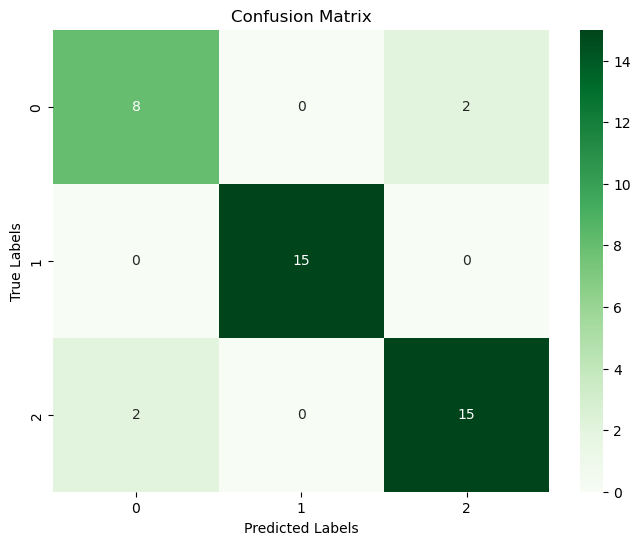

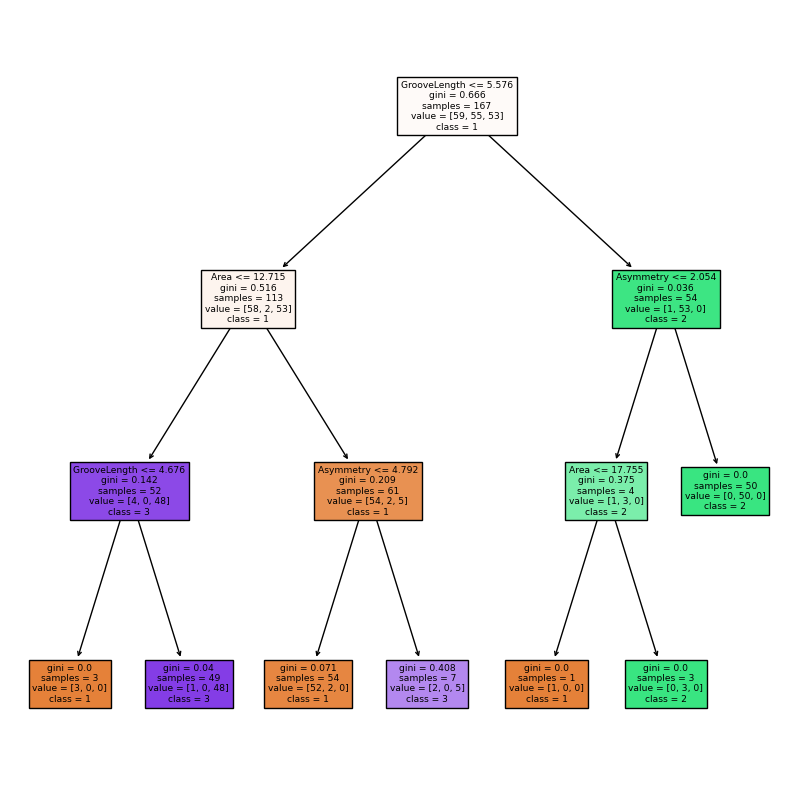

In [9]:
# Create and train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(max_depth=3,random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
predictions = dt_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Visualize the decision tree
plt.figure(figsize=(10,10))
plot_tree(dt_classifier, filled=True, feature_names=['Area', 'Perimeter', 'Compactness', 'Length', 'Width',
                                                     'Asymmetry', 'GrooveLength'], class_names=["1", "2", "3"])
plt.show()